# Analysis and Understanding of Customer Churn Dataset, and Drawing Conclusions

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')

## Importing Data

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\data-science-projects\Customer_Churn_Project\customer_churn_dataset-training-master.csv")

## Checking Basic Stats and Cleaning if Necessary

In [3]:
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [27]:
# Checking the shape of the data
data.shape

(440832, 11)

In [8]:
# Removing Customer ID as it is not necessary for our analysis, and also holds personal information about the users
data.drop(columns='CustomerID',inplace=True)

In [11]:
# Renaming columns for easy usage
data.columns=data.columns.str.lower()

In [13]:
# Checking is there any duplicated values
data.duplicated().sum()

np.int64(0)

In [15]:
# Checking if there is any null value
data.isnull().sum()

age                  1
gender               1
tenure               1
usage frequency      1
support calls        1
payment delay        1
subscription type    1
contract length      1
total spend          1
last interaction     1
churn                1
dtype: int64

In [21]:
# Checking the null valued column
data[data.isnull().any(axis=1)]

,age,gender,tenure,usage frequency,support calls,payment delay,subscription type,contract length,total spend,last interaction,churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is only one null valued column, so its best to remove it

In [24]:
# Removing the null valued column
data=data[~data.isnull().any(axis=1)]

In [25]:
# Checking if there is any column that have only 1 unique value
data.nunique()

age                     48
gender                   2
tenure                  60
usage frequency         30
support calls           11
payment delay           31
subscription type        3
contract length          3
total spend          68363
last interaction        30
churn                    2
dtype: int64

There is no single uniqe valued column

In [30]:
# Checking the target column
data['churn'].value_counts(normalize=True)*100

churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64

As I can see, the target column is not biased to any class, there are kind of similary number of values

In [31]:
# Checking the values of numerical columns
data.describe()

,age,tenure,usage frequency,support calls,payment delay,total spend,last interaction,churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


Age column have normal values ranging from 18 to 65, means age value is spreaded ----

Tenure column have normal values ranging from 1 to 60, means from new to old, all customers are listed ----

Usage Frequence have normal values ranging from 1 to 30, means regular user and non regular users are included ----

Support calls column have normal values ranging from 0 to 10, means customers with no calls and customer with many calls both are included ----

Payment delay column have normal values ranging from 0 to 30, means all types of delays are included ----

Total spend also have normal values ranging from 100 to 1000 ----

Last interaction have also normal values ranging from 1 to 30 ----

### As I can see, values of the column are in proper format, so no need to do data cleaning...

## Univariate Analysis

In [35]:
def plot_kde(value,data=data):
    upper=data[value].max()
    lower=data[value].min()
    range_of_value=np.linspace(lower,upper,10)
    sns.kdeplot(data[value],color='cyan')
    plt.xticks(range_of_value)
    plt.xlim(lower-5,upper+5)
    plt.show()

In [37]:
def plot_bar(value,data=data):
    percent_values=(data[value].value_counts(normalize=True)*100)
    plt.figure(figsize=(8,5))
    plot=sns.barplot(percent_values,palette='pastel')
    plt.xticks(percent_values.index)
    for container in plot.containers:
        plot.bar_label(container,fmt="%.2f")
    plt.xlabel(value)
    plt.ylabel('Percentage of Values')
    plt.show()

### Age

In [38]:
data['age'].describe()

count    440832.000000
mean         39.373153
std          12.442369
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: age, dtype: float64

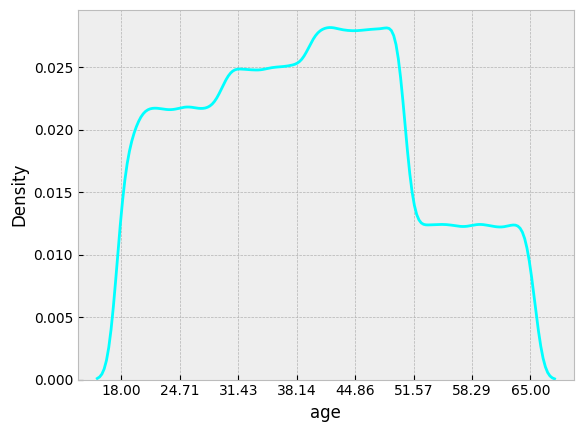

In [34]:
plot_kde('age')

There are majority values in the lower age range, and lesser values in the uppper age range...so I can assume that the old aged people are less intrested in this service